In [52]:
from langchain_community.llms import Ollama
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Pinecone as P1
from langchain_text_splitters import RecursiveCharacterTextSplitter
from pinecone import Pinecone as p1, ServerlessSpec
from langchain_pinecone import PineconeVectorStore
import fitz  

In [16]:
llm_vision = Ollama(model="llava")
llm_text = Ollama(model="llama3")

In [17]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=20
)

In [6]:
def extract_pdf_text(pdf_path):
    document = fitz.open(pdf_path)
    
    text = ""
    
    for page_num in range(document.page_count):
        page = document.load_page(page_num)
        
        text += page.get_text()
    
    document.close()
    
    return text

In [7]:
pdf_path = r"C:\Users\musta\OneDrive\Desktop\visulaize\brain.pdf"
extracted_text = extract_pdf_text(pdf_path)

In [4]:
extracted_text

NameError: name 'extracted_text' is not defined

In [9]:
chunks = text_splitter.split_text(extracted_text)

In [19]:
import os
os.environ['PINECONE_API_KEY'] = '39c3b55b-2ae4-44ee-a9cd-83a99876c828'
pc = p1(
    api_key=os.environ.get("PINECONE_API_KEY")
)

In [20]:
embeding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_

In [12]:
index_name="test1"
index = pc.Index("test1")  
for i, t in zip(range(len(chunks)), chunks):
   query_result = embeding.embed_query(t)
   print(i,t)
   index.upsert(
   vectors=[
        {
            "id": str(i),  
            "values": query_result, 
            "metadata": {"text":str(t)} 
        }
    ],
    namespace="real" 
)


0 NEUROSCIENCE
SCIENCE OF THE BRAIN
AN INTRODUCTION FOR YOUNG STUDENTS
1 British Neuroscience Association
European Dana Alliance for the Brain
2 PDF Page Organizer - Foxit Software
Neuroscience: the Science of the Brain
3 Inside our heads, weighing about 1.5 kg, is an astonishing living organ consisting of
4 billions of tiny cells.  It enables us to sense the world around us, to think and to talk.
5 The human brain is the most complex organ of the body, and arguably the most
6 complex thing on earth. This booklet is an introduction for young students.
7 In this booklet, we describe what we know about how the brain works and how much
8 there still is to learn.  Its study involves scientists and medical doctors from many
9 disciplines, ranging from molecular biology through to experimental psychology, as
10 well as the disciplines of anatomy, physiology and pharmacology. Their shared
11 interest has led to a new discipline called neuroscience - the science of the brain.
12 The brain desc

In [21]:
from langchain_pinecone import PineconeVectorStore

index_name = "test1"

vectorstore = PineconeVectorStore(index_name=index_name, embedding=embeding,namespace="real")

In [22]:
retrieval_qa = RetrievalQA.from_chain_type(
    llm=llm_text,
    chain_type="stuff",
    retriever=vectorstore.as_retriever()
)

In [16]:
retrieval_qa.run("summarize complete ?")

'Based on the given context, I don\'t know how to summarize "complete". The text appears to be discussing incomplete phenomena in biology and language (phonemes and words), but it doesn\'t provide enough information to define or summarize what "complete" means in this context.'

In [23]:
import base64
import io
from PIL import Image
from langchain_community.llms import Ollama

In [53]:
def explain_image_with_llava(llava_model, image_path, query):
    image = Image.open(image_path)
    with io.BytesIO() as buffer:
        image.save(buffer, format="PNG")
        image_data = buffer.getvalue()
    encoded_image = base64.b64encode(image_data).decode('utf-8')
    
    prompt = query
    
    response = llava_model.generate(prompts=[prompt], images=[encoded_image])
    
    return response

In [ ]:

query = "Describe the content of the following image in the context of brain biology.only give explanation related brain biology"

In [1]:

explanation = explain_image_with_llava(llm_vision, image_path, query)

print(explanation)


generations=[[GenerationChunk(text=' The image shows a stylized human brain with a particular focus on a section highlighted by a red outline. Within this outlined area, there is a diagrammatic representation of an aneurysm, which is a localized dilation and thinning of the blood vessel walls. An aneurysm can be considered a pathological condition in the context of brain biology, as it is associated with increased risk of bleeding and may lead to subarachnoid hemorrhage (SAH) if ruptured.\n\nThe image also features a medical illustration of a human head from behind, indicating that the brain is part of the head. Additionally, there is an arrow pointing towards the highlighted area on the brain, which suggests that this is the region where the medical issue or condition depicted in the illustration is located. This could be a visual aid used to educate about a specific type of aneurysm or its location within the brain. ', generation_info={'model': 'llava', 'created_at': '2024-08-11T15:2

In [24]:
print(explanation)


generations=[[GenerationChunk(text=' The image shows a stylized human brain with a particular focus on a section highlighted by a red outline. Within this outlined area, there is a diagrammatic representation of an aneurysm, which is a localized dilation and thinning of the blood vessel walls. An aneurysm can be considered a pathological condition in the context of brain biology, as it is associated with increased risk of bleeding and may lead to subarachnoid hemorrhage (SAH) if ruptured.\n\nThe image also features a medical illustration of a human head from behind, indicating that the brain is part of the head. Additionally, there is an arrow pointing towards the highlighted area on the brain, which suggests that this is the region where the medical issue or condition depicted in the illustration is located. This could be a visual aid used to educate about a specific type of aneurysm or its location within the brain. ', generation_info={'model': 'llava', 'created_at': '2024-08-11T15:2

In [40]:
def extract_explanation(llava_response):
    
    if hasattr(llava_response, 'generations'):
        return llava_response.generations[0][0].text
    else:
        raise ValueError("Unexpected response format")

explanation_text = extract_explanation(explanation)
print("Explanation:", explanation_text)


Explanation:  The image shows a stylized human brain with a particular focus on a section highlighted by a red outline. Within this outlined area, there is a diagrammatic representation of an aneurysm, which is a localized dilation and thinning of the blood vessel walls. An aneurysm can be considered a pathological condition in the context of brain biology, as it is associated with increased risk of bleeding and may lead to subarachnoid hemorrhage (SAH) if ruptured.

The image also features a medical illustration of a human head from behind, indicating that the brain is part of the head. Additionally, there is an arrow pointing towards the highlighted area on the brain, which suggests that this is the region where the medical issue or condition depicted in the illustration is located. This could be a visual aid used to educate about a specific type of aneurysm or its location within the brain. 


In [43]:
from langchain_pinecone import PineconeVectorStore
from langchain.embeddings import HuggingFaceEmbeddings
import os


index_name = "test1"

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = PineconeVectorStore(index_name=index_name, embedding=embeddings, namespace="real")

similar_docs = vectorstore.similarity_search(explanation_text,k=3)

c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


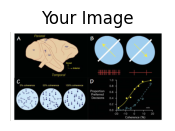

Response from Llama 3: A knowledge base treasure trove!

After reviewing the documents you provided, I'll give you a combined explanation that relates to all three.

It appears that we're discussing the brain and its structures. The first document mentions that "brain represents the normal function of that region," suggesting that different parts of the brain are responsible for specific functions or processes.

The second document shows an image with a red circle, which seems to represent the shape of spikes in the brain. This could be related to electroencephalography (EEG) or electrophysiology studies, which measure electrical activity in the brain. The spikes might correspond to neuronal activity or specific neural events.

The third document provides a description of the hippocampus, which is a region within the temporal lobe of the brain. It's known for its role in memory formation and spatial navigation. The image is likely a Golgi stain, a type of histological staining techniqu

In [56]:
similar_docs_texts = [doc.page_content for doc in similar_docs]
image_path = r"C:\Users\musta\OneDrive\Desktop\visulaize\images.png"

llm = Ollama(model="llama3")

prompt_template = PromptTemplate(
    template="i give you multiple documents from my knowledge base give only related answer explain the following documents combine not separate explanation combine explanation: {documents}, provide a comprehensive analysis.",
    input_variables=["documents"]
)

llm_chain = LLMChain(
    llm=llm,
    prompt=prompt_template
)

documents_text = "\n\n".join(similar_docs_texts)

response = llm_chain.run({"documents": documents_text})

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread(image_path)

plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.axis('off')  
plt.title("Your Image")
plt.show()

print("Response from Llama 3:", response)